In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from compotime.preprocess import treat_small

In [2]:
def plot_time_series(
    time_series: pd.DataFrame,
    fitted_curve: pd.DataFrame = None,
    predictions: pd.DataFrame = None,
    num_series: int = None,
) -> None:
    if not num_series:
        num_series = time_series.shape[1]

    color_cycle = plt.rcParams["axes.prop_cycle"].by_key()["color"]
    colors = [color_cycle[i % len(color_cycle)] for i in range(num_series)]

    for i, (name, series) in enumerate(time_series.iloc[:, :num_series].items()):
        color = colors[i]
        series.plot(color=color, figsize=(10, 7), label=name)
        if fitted_curve is not None:
            fitted_curve.iloc[:, i].plot(color=color, linestyle="--", label="")

        if predictions is not None:
            predictions.iloc[:, i].plot(color=color, linestyle=":", label="")

    if predictions is not None:
        plt.axvline(predictions.index[0], color="red", linestyle="--")

    plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")  # Move legend to right corner
    plt.subplots_adjust(right=0.8)  # Adjust the right margin to make room for the legend
    plt.show()

In [3]:
df = pd.read_csv("data/share_energy_source.csv")
df["Year"] = [pd.Period(x) for x in df["Year"]]
df = df.set_index("Year")

rng = np.random.default_rng(0)

nullable_periods = 15
years = pd.period_range("1965", periods=nullable_periods, freq="Y")
for col in df.columns:
    # Set different starts
    df.loc[years[: rng.integers(0, high=10, size=1).item()], col] = np.nan

df = df.div(df.sum(axis=1), axis=0)

df = treat_small(df, minimum=1e-6)
df

,Oil,Coal,Solar,Nuclear,Hydro,Wind,Gas,Other renewables
Year,,,,,,,,
1965,NaN,NaN,NaN,NaN,NaN,0.000001,0.991202,0.008797
1966,NaN,NaN,NaN,NaN,NaN,0.000001,0.991091,0.008908
1967,NaN,NaN,NaN,0.015406,NaN,0.000001,0.976338,0.008256
1968,NaN,NaN,NaN,0.012979,0.274919,0.000001,0.706042,0.006059
1969,NaN,NaN,NaN,0.014140,0.267536,0.000001,0.712471,0.005852
1970,NaN,NaN,0.000001,0.016712,0.259358,0.000001,0.717929,0.005999
1971,NaN,0.542270,0.000001,0.009950,0.115990,0.000001,0.328997,0.002792
1972,NaN,0.530500,0.000001,0.013350,0.117444,0.000001,0.335816,0.002888
1973,0.492113,0.267239,0.000001,0.008751,0.058279,0.000001,0.172098,0.001516


In [4]:
%%time
from compotime import LocalLevelForecaster

horizon = 10

model = LocalLevelForecaster().fit(df)
predictions = model.predict(horizon)

CPU times: user 13.3 s, sys: 42.1 ms, total: 13.3 s
Wall time: 17.8 s


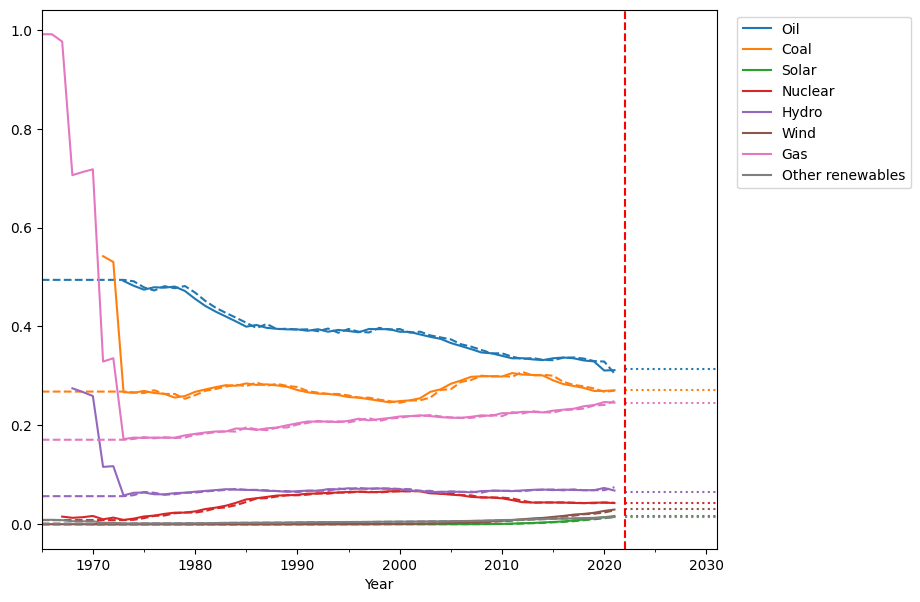

In [5]:
plot_time_series(df, model.fitted_curve_, predictions)

In [6]:
%%time
from compotime import LocalTrendForecaster

horizon = 10

model = LocalTrendForecaster().fit(df)
predictions = model.predict(horizon)

CPU times: user 1min 1s, sys: 101 ms, total: 1min 1s
Wall time: 1min 6s


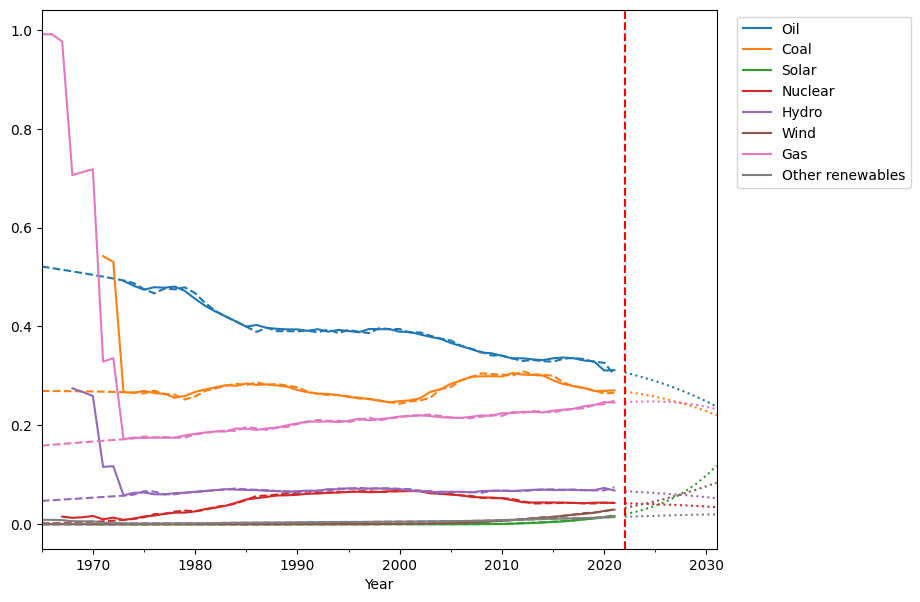

In [7]:
plot_time_series(df, model.fitted_curve_, predictions)